# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 

### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.

### Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Выбраны следующие столбцы:
#1 - Хирургия
#2 - Возраст
#5 - Пульс
#11 - боль 
#13 - Вздутие живота
#18  Живот (4-5 указывают на хирургическое вмешательство)
#20 - Общий белок
#23 - Результат: Умерла,Жива, Эфтаназия
#horse = pd.read_csv(r'E:\Pyda-20\statistics_basics\horse_data.csv',names = ['Хирургия','Возраст','Пульс','Боль','Вздутие','Живот','Общий белок','Результат'] )
#horse = pd.read_csv(r'E:\Pyda-20\statistics_basics\horse_data.csv',usecols=[0,1,2,4,10,12,17,19,22],names = ['Хирургия','Возраст','Больница','Пульс','Боль','Вздутие','Живот','Общий белок','Результат'] )
horse = pd.read_csv(r'E:\Pyda-20\statistics_basics\horse_data.csv',usecols=[0,1,4,10,12,17,19,22],names = ['Хирургия','Возраст','Пульс','Боль','Вздутие','Живот','Общий белок','Результат'] )

In [4]:
horse.replace({'?':np.nan},inplace=True)
horse

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
0,2,1,66,5,4,5,8.40,2
1,1,1,88,3,2,2,85,3
2,2,1,40,3,1,1,6.70,1
3,1,9,164,2,4,NaN,7.20,2
4,2,1,104,NaN,NaN,NaN,7.40,2
...,...,...,...,...,...,...,...,...
295,1,1,120,2,NaN,5,65,3
296,2,1,72,4,3,4,NaN,3
297,1,1,72,4,3,5,6.80,2
298,1,1,100,3,3,4,6.00,1


In [5]:
#horse.fillna(method='ffill')
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Хирургия     299 non-null    object
 1   Возраст      300 non-null    int64 
 2   Пульс        276 non-null    object
 3   Боль         245 non-null    object
 4   Вздутие      244 non-null    object
 5   Живот        182 non-null    object
 6   Общий белок  267 non-null    object
 7   Результат    299 non-null    object
dtypes: int64(1), object(7)
memory usage: 18.9+ KB


In [6]:
horse = horse.astype(float)
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Хирургия     299 non-null    float64
 1   Возраст      300 non-null    float64
 2   Пульс        276 non-null    float64
 3   Боль         245 non-null    float64
 4   Вздутие      244 non-null    float64
 5   Живот        182 non-null    float64
 6   Общий белок  267 non-null    float64
 7   Результат    299 non-null    float64
dtypes: float64(8)
memory usage: 18.9 KB


In [7]:
horse.describe()

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
count,299.000000,300.000000,276.000000,245.00000,244.000000,182.000000,267.000000,299.000000
mean,1.397993,1.640000,71.913043,2.95102,2.266393,3.692308,24.456929,1.551839
std,0.490305,2.173972,28.630557,1.30794,1.065131,1.491725,27.475009,0.737187
min,1.000000,1.000000,30.000000,1.00000,1.000000,1.000000,3.300000,1.000000
25%,1.000000,1.000000,48.000000,2.00000,1.000000,2.000000,6.500000,1.000000
50%,1.000000,1.000000,64.000000,3.00000,2.000000,4.000000,7.500000,1.000000
75%,2.000000,1.000000,88.000000,4.00000,3.000000,5.000000,57.000000,2.000000
max,2.000000,9.000000,184.000000,5.00000,4.000000,5.000000,89.000000,3.000000


In [8]:
horse.mode()

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
0,1.0,1.0,48.0,3.0,1.0,5.0,6.5,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN


In [25]:
horse.var()

Хирургия         0.240399
Возраст          4.726154
Пульс          819.708775
Боль             1.710706
Вздутие          1.134504
Живот            2.225244
Общий белок    754.876145
Результат        0.543445
dtype: float64

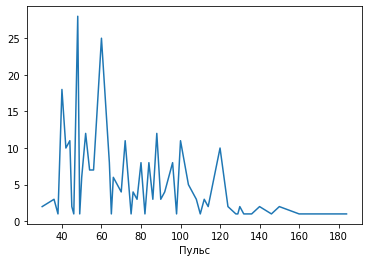

In [24]:
horse.groupby(by='Пульс')['Возраст'].count().plot()

### Задача 1:
* Хирургия - категориальный показатель, 299 значений в выборке заполнено. 60% лечилось с вмешательтвом остальные 40% без. Мода также подверждает что наиболее частое значение 1.
* Возраст - категориальный показатель, заполнено 300 значений, судя по максимуму часть значений введены как месяцы(годы) без отнесения к категории требуют доп. обработки. Так как по описанию данные есть 2 типа - Взрослая или молодая лошадь. В основном в выборке взрослые лошади.
* Пульс - непрерывная величина. Есть данные о 276 измерениях. Наиболее часто встречаемое значение 48. С учетом того что нормальный пульс 30-40 для взрослой лошади, говорит что лошади испытывают различные проблемы. Размах 154. Среднее 71,9. Медианное значение 64. Есть выбросы в верхнем уровне выше 141.
* Боль - категориальный показатель. В выборке заполнено 245 значений. Медиана 3 что говорит о часто встречаемой прерывистой легкой боли.
* Вздутие - Категориальный. В выборке заполнено 244 значения. Мода равна 1, наиболее частое значение говорит о том что вздутия нет. 
* Живот - Категориальный. В выборке много пропусков, возможно детальные обследованяи не проводились. Заполнено 182 значения. Мода говорит о наиболее часто встречаемой категории - 5 . Что говорит о уже проводившемся хирургическом вмешательстве.Среднее подверждает данные о том что в заполненых данных больше случаев 4 и 5 
* Общий белок - непрерывная величина. 267 данных внесено. Наиболее частый показатель 6,5(мода) что говорит о "нормальности".Выбросов нет. Среднее 24,4.. говорит что у лошадей с проблемами происходит обезвоживание показатель находиться в 2х группах "нормально" и от 55 до 89. Размах 85,7. 
* Результат (лечения) - категориальный. Заполнено 299 значений. Мода равна 1, чаще всего лечении положительно сказывалось и лошадь жила дальше.В остальных случаях смерть от лечения или усыпление.


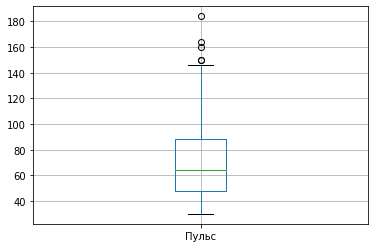

In [13]:
horse['Пульс'].plot(kind='box',grid=True)

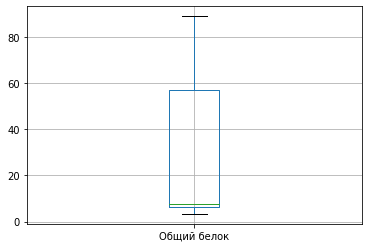

In [40]:
horse['Общий белок'].plot(kind='box',grid=True)

### Задача 2

Выбрал 2 числовых столбца - Пульс и Общий белок.
* Общий белок - без выбросов.
* Пульс - есть выбросы, 5 штук. В большинстве случаев вызваны тяжелым состоянием, в итоге лошади не выжили можно оставить в выборке.1 лошадь выжила, лечение было без хирургии.

In [36]:
q1 = horse['Пульс'].quantile(0.25)
q3 = horse['Пульс'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
outliers = horse[horse['Пульс']>upper_bound]
outliers

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
3,1.0,9.0,164.0,2.0,4.0,NaN,7.2,2.0
41,2.0,9.0,150.0,NaN,NaN,NaN,8.5,1.0
55,1.0,9.0,160.0,3.0,4.0,NaN,NaN,2.0
255,1.0,9.0,184.0,4.0,3.0,NaN,3.3,2.0
275,1.0,9.0,150.0,5.0,2.0,NaN,6.2,2.0


In [32]:
print(q1,q3,iqr)
print(lower_bound,upper_bound)

48.0 88.0 40.0
-12.0 148.0


In [59]:
horse.describe()

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
count,299.000000,300.000000,276.000000,245.00000,244.000000,182.000000,267.000000,299.000000
mean,1.397993,1.640000,71.913043,2.95102,2.266393,3.692308,24.456929,1.551839
std,0.490305,2.173972,28.630557,1.30794,1.065131,1.491725,27.475009,0.737187
min,1.000000,1.000000,30.000000,1.00000,1.000000,1.000000,3.300000,1.000000
25%,1.000000,1.000000,48.000000,2.00000,1.000000,2.000000,6.500000,1.000000
50%,1.000000,1.000000,64.000000,3.00000,2.000000,4.000000,7.500000,1.000000
75%,2.000000,1.000000,88.000000,4.00000,3.000000,5.000000,57.000000,2.000000
max,2.000000,9.000000,184.000000,5.00000,4.000000,5.000000,89.000000,3.000000


### Задача 3
Расчитать кол-во пропусков:
* Хирургия - пропущено 1 значение, по данной лошади есть все показатели кроме результата лечения и хирургии. 
  Исходя из показателей Боли и Живота к лошади применялась хирургия и её нужно применить повторно.
* Возраст - нет пропусков, но есть отклонение с возрастом 9, стоит изменить его и заменить на 1(взрослая особь) или внести новый параметр (3 - старая особь).
* Пульс - 24 пропусков, заполнять по группам средней исходя из Боли. Оставшиеся значения заполнить по Пульсу экспертно меньше 30 - 1, больше 100 - 4.
* Боль - 55 пропусков,  заполнять по группам средней исходя из Живота, Вздутия и Пульса. Есть не целые значения боли.
* Вздутие - 56 пропусков, заполнять по группам исходя из живота, общего белка и боли и наличия хирургии.
* Живот - 118 пропусков, заполняем последовательно медианой исходя из Хирургия, Общий белок. Потом Вздутие, остатоку присваеваем значение 4.
* Результат - 1 пропуск, исходя из параметров выведенных нами заполняем его значением 2.


In [188]:
#Итоговое преобразование дата сета для наполнения его данными
fill_horse = horse
#Хирургия
fill_horse['Хирургия'].fillna(1, inplace=True)
#Пульс
fill_horse['Пульс'].fillna(horse.groupby(['Хирургия', 'Боль','Результат'])['Пульс'].transform('median').round(0), inplace=True)
fill_horse['Пульс'].fillna(horse.groupby(['Хирургия', 'Результат'])['Пульс'].transform('median').round(0), inplace=True)
#Боль
#fill_horse['Боль'].fillna(horse.groupby(['Пульс', 'Результат'])['Боль'].transform('median'), inplace=True)
fill_horse['Боль'].fillna(horse.groupby(['Пульс'])['Боль'].transform('median').round(0), inplace=True)
fill_horse[horse['Пульс'] > 100]['Боль'].fillna(4, inplace=True)
fill_horse['Боль'].fillna(1, inplace=True)
#Вздутие
fill_horse['Вздутие'].fillna(horse.groupby(['Боль','Общий белок'])['Вздутие'].transform('median').round(0), inplace=True)
fill_horse['Вздутие'].fillna(horse.groupby(['Боль'])['Вздутие'].transform('median').round(0), inplace=True)
#Почему эти две команды не отработали????
fill_horse[horse['Результат'] > 1.0]['Вздутие'].fillna(4, inplace=True)
fill_horse[horse['Результат'] == 1.0]['Вздутие'].fillna(1, inplace=True)
#Живот
fill_horse['Живот'].fillna(horse.groupby(['Хирургия','Общий белок'])['Живот'].transform('median').round(0), inplace=True)
fill_horse['Живот'].fillna(horse.groupby(['Вздутие'])['Живот'].transform('median').round(0), inplace=True)
fill_horse['Живот'].fillna(4, inplace=True)
#fill_horse[horse['Хирургия'] == 1.0]['Живот'].fillna(1, inplace=True)
# Общий белок
fill_horse['Общий белок'].fillna(horse.groupby(['Вздутие','Живот'])['Общий белок'].transform('median').round(0), inplace=True)
fill_horse['Общий белок'].fillna(horse.groupby(['Живот'])['Общий белок'].transform('median').round(0), inplace=True)

# Результат
fill_horse['Результат'].fillna(2, inplace=True)

#Остаток вздутий
fill_horse['Вздутие'].fillna(horse.groupby(['Пульс','Живот'])['Вздутие'].transform('median').round(0), inplace=True)
fill_horse['Вздутие'].fillna(2, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


10.0

In [189]:
print(horse.groupby(['Пульс','Живот'])['Вздутие'].median().round(0))
#print(horse.groupby(['Пульс'])['Боль'].median())
fill_horse[fill_horse['Вздутие'].isnull()==True]

Пульс  Живот
30.0   3.0      1.0
       5.0      1.0
36.0   1.0      1.0
       4.0      3.0
       5.0      2.0
               ... 
146.0  3.0      1.0
150.0  4.0      2.0
160.0  5.0      4.0
164.0  5.0      4.0
184.0  5.0      3.0
Name: Вздутие, Length: 123, dtype: float64


,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат


In [190]:
fill_horse.describe()

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.396667,1.640000,72.143333,2.893333,2.233333,3.833333,23.423333,1.553333
std,0.490023,2.173972,27.851904,1.265158,1.040431,1.313255,26.375982,0.736408
min,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,3.300000,1.000000
25%,1.000000,1.000000,48.000000,2.000000,1.000000,3.000000,6.600000,1.000000
50%,1.000000,1.000000,64.000000,3.000000,2.000000,4.000000,7.500000,1.000000
75%,2.000000,1.000000,88.000000,4.000000,3.000000,5.000000,53.250000,2.000000
max,2.000000,9.000000,184.000000,5.000000,5.000000,5.000000,89.000000,3.000000


In [54]:
horse[horse['Хирургия'].isnull()==True]

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
132,NaN,1.0,48.0,4.0,1.0,5.0,73.0,NaN


In [71]:
horse[horse['Пульс'].isnull()==True]

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
56,1.0,1.0,NaN,NaN,NaN,NaN,6.7,1.0
74,1.0,9.0,NaN,NaN,NaN,NaN,4.9,2.0
175,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
207,1.0,1.0,NaN,NaN,NaN,NaN,8.7,2.0
216,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
227,1.0,9.0,NaN,NaN,NaN,NaN,6.5,1.0
288,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0


In [57]:
horse[horse['Боль'].isnull()==True]

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
4,2.0,1.0,104.0,NaN,NaN,NaN,7.4,2.0
7,1.0,1.0,60.0,NaN,2.0,4.0,8.3,2.0
17,2.0,1.0,48.0,NaN,NaN,NaN,NaN,1.0
19,2.0,1.0,110.0,NaN,3.0,NaN,8.7,1.0
24,1.0,1.0,60.0,NaN,3.0,NaN,65.0,1.0
25,2.0,1.0,60.0,NaN,NaN,NaN,NaN,1.0
27,1.0,1.0,48.0,NaN,2.0,3.0,5.5,1.0
28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
36,2.0,1.0,112.0,NaN,1.0,5.0,6.0,3.0
39,1.0,9.0,146.0,NaN,NaN,NaN,NaN,2.0


In [60]:
horse[horse['Вздутие'].isnull()==True]

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
4,2.0,1.0,104.0,NaN,NaN,NaN,7.4,2.0
17,2.0,1.0,48.0,NaN,NaN,NaN,NaN,1.0
23,1.0,9.0,130.0,2.0,NaN,NaN,70.0,1.0
25,2.0,1.0,60.0,NaN,NaN,NaN,NaN,1.0
28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
33,1.0,1.0,64.0,3.0,NaN,4.0,8.6,1.0
39,1.0,9.0,146.0,NaN,NaN,NaN,NaN,2.0
41,2.0,9.0,150.0,NaN,NaN,NaN,8.5,1.0
44,1.0,1.0,140.0,4.0,NaN,5.0,69.0,3.0
53,2.0,1.0,40.0,NaN,NaN,NaN,6.4,1.0


In [61]:
horse[horse['Живот'].isnull()==True]

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
3,1.0,9.0,164.0,2.0,4.0,NaN,7.2,2.0
4,2.0,1.0,104.0,NaN,NaN,NaN,7.4,2.0
9,2.0,9.0,90.0,5.0,1.0,NaN,6.2,1.0
15,1.0,1.0,96.0,5.0,3.0,NaN,6.8,2.0
17,2.0,1.0,48.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...
284,2.0,1.0,54.0,3.0,1.0,NaN,6.8,1.0
286,2.0,1.0,82.0,4.0,3.0,NaN,7.0,3.0
287,2.0,9.0,84.0,NaN,NaN,NaN,5.0,1.0
288,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0


In [62]:
horse[horse['Общий белок'].isnull()==True]

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
5,2.0,1.0,NaN,2.0,2.0,3.0,NaN,1.0
17,2.0,1.0,48.0,NaN,NaN,NaN,NaN,1.0
25,2.0,1.0,60.0,NaN,NaN,NaN,NaN,1.0
28,1.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0
39,1.0,9.0,146.0,NaN,NaN,NaN,NaN,2.0
51,1.0,1.0,84.0,3.0,2.0,5.0,NaN,2.0
55,1.0,9.0,160.0,3.0,4.0,NaN,NaN,2.0
59,2.0,1.0,96.0,5.0,4.0,5.0,NaN,2.0
72,1.0,1.0,56.0,NaN,NaN,NaN,NaN,2.0
81,1.0,1.0,40.0,2.0,2.0,5.0,NaN,1.0


In [64]:
horse.dropna().describe()

,Хирургия,Возраст,Пульс,Боль,Вздутие,Живот,Общий белок,Результат
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,1.401460,1.233577,70.065693,2.810219,2.248175,3.605839,20.805839,1.489051
std,0.491993,1.351811,24.310553,1.215905,1.034557,1.496848,25.507268,0.697862
min,1.000000,1.000000,36.000000,1.000000,1.000000,1.000000,4.000000,1.000000
25%,1.000000,1.000000,48.000000,2.000000,1.000000,2.000000,6.500000,1.000000
50%,1.000000,1.000000,66.000000,3.000000,2.000000,4.000000,7.300000,1.000000
75%,2.000000,1.000000,88.000000,4.000000,3.000000,5.000000,9.100000,2.000000
max,2.000000,9.000000,140.000000,5.000000,4.000000,5.000000,85.000000,3.000000


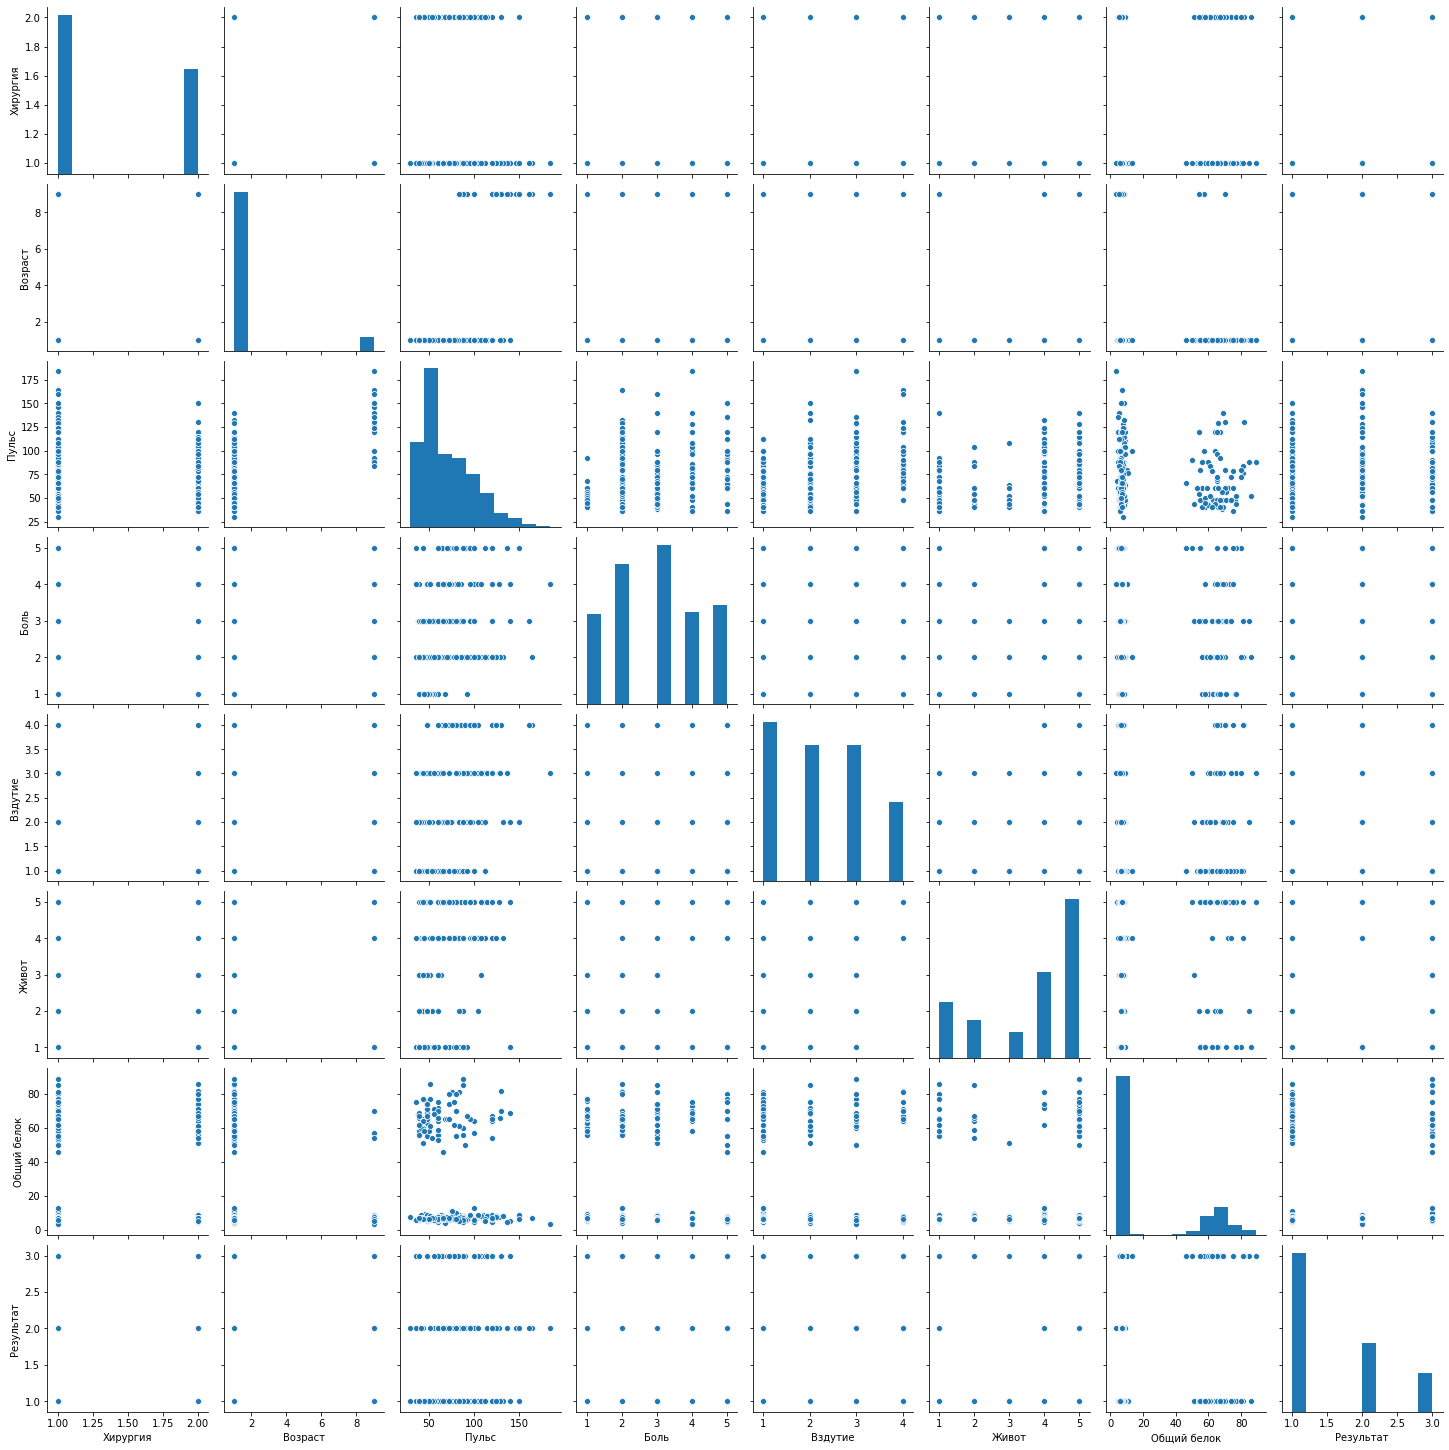

In [38]:
import seaborn as sns
sns.pairplot(horse)

## Дополнительная часть (необязательная)

Выполнить задания 1-3 для всего набора данных.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.